# Monte Carlo Solution of Heat equation

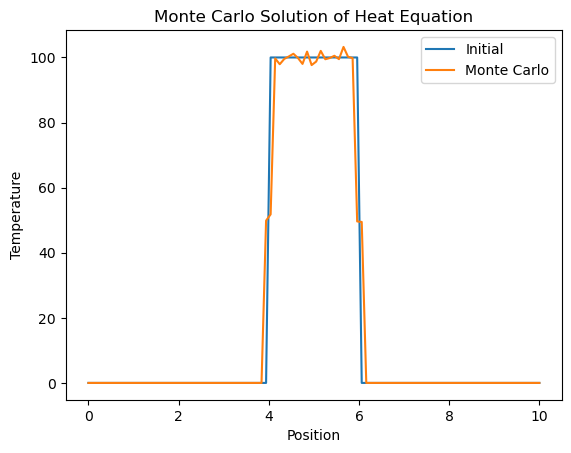

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10.0          # Length of the rod
N = 100           # Number of segments
dx = L / N        # Spatial step size
alpha = 0.01      # Thermal diffusivity
dt = (dx**2) / (2 * alpha)  # Time step size for stability
T = 1.0           # Total simulation time
num_steps = int(T / dt)  # Number of time steps
num_particles = 100000   # Number of particles

# Initial temperature distribution
initial_temp = np.zeros(N)
initial_temp[N//2 - 10:N//2 + 10] = 100  # Heat pulse in the middle

# Boundary conditions
boundary_temp = 0

# Initialize particles
particles = np.random.choice(N, size=num_particles, p=initial_temp/np.sum(initial_temp))

# Monte Carlo simulation
for step in range(num_steps):
    for i in range(num_particles):
        if particles[i] == 0:
            particles[i] += 1  # Reflective boundary at left end
        elif particles[i] == N - 1:
            particles[i] -= 1  # Reflective boundary at right end
        else:
            move = np.random.choice([-1, 1])
            particles[i] += move

# Estimate temperature
temperature = np.zeros(N)
for p in particles:
    temperature[p] += 1

temperature = (temperature / num_particles) * np.sum(initial_temp)

# Plot the result
x = np.linspace(0, L, N)
plt.plot(x, initial_temp, label='Initial')
plt.plot(x, temperature, label='Monte Carlo')
plt.xlabel('Position')
plt.ylabel('Temperature')
plt.legend()
plt.title('Monte Carlo Solution of Heat Equation')
plt.show()


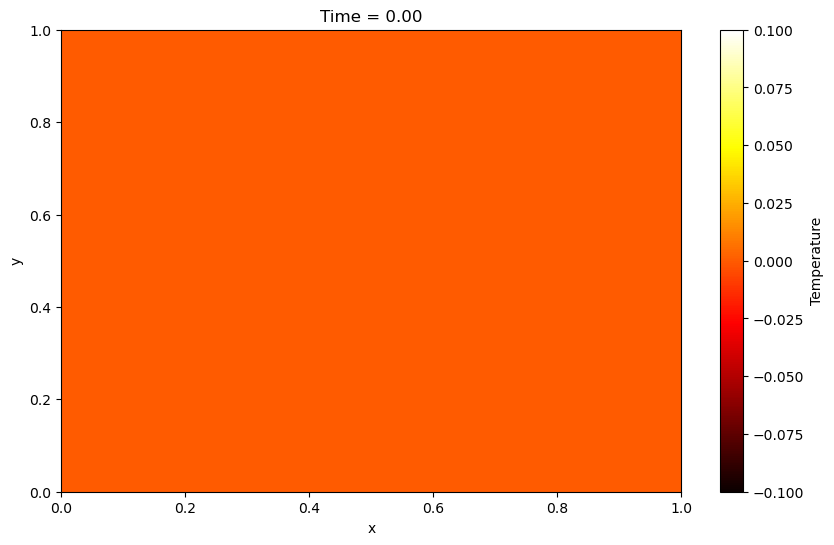

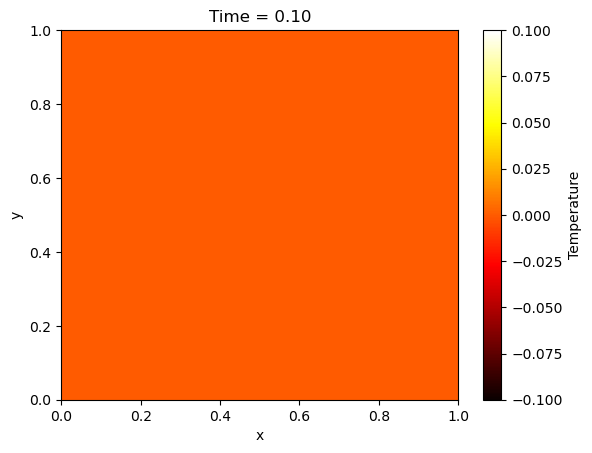

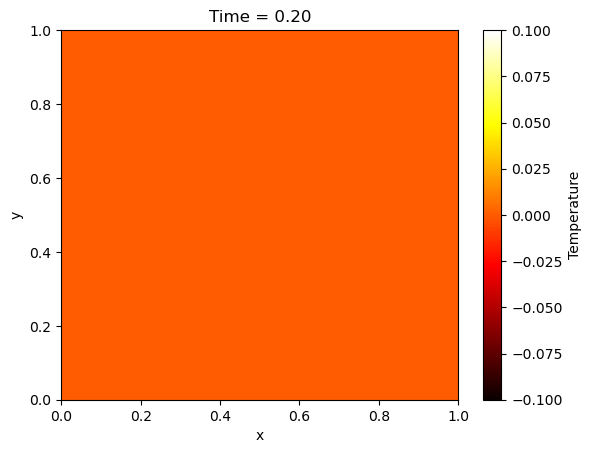

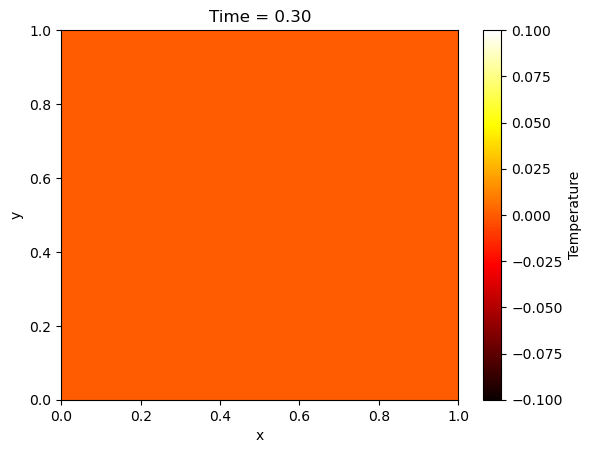

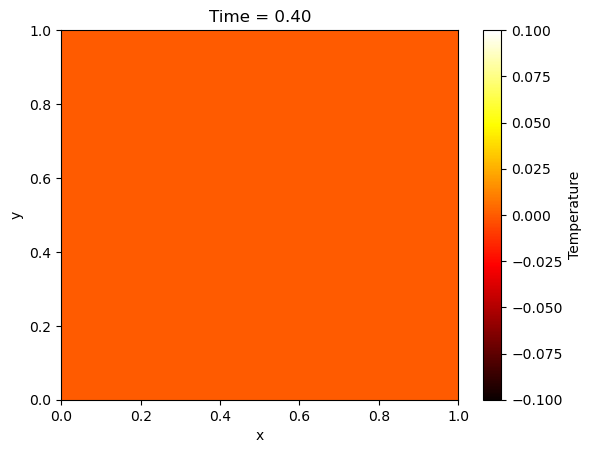

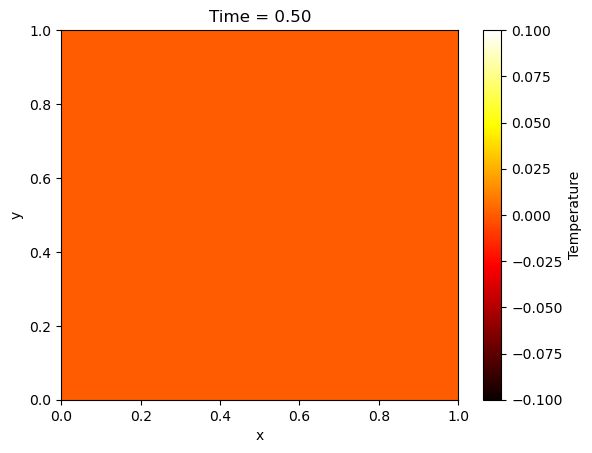

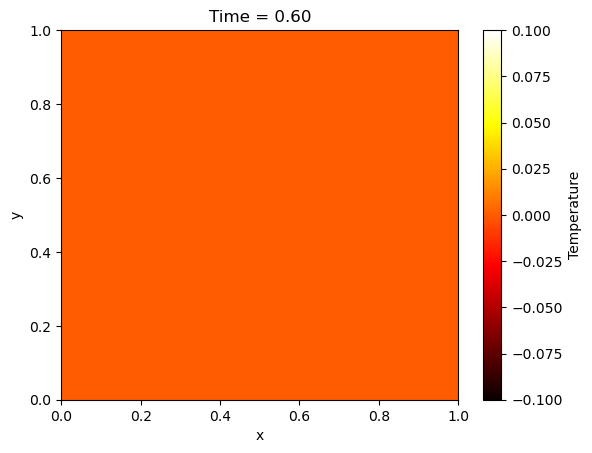

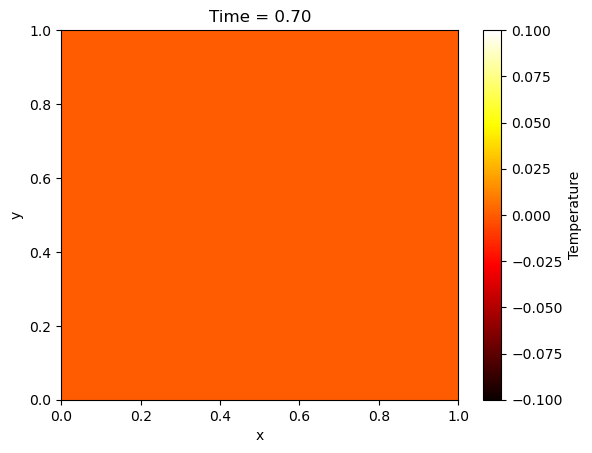

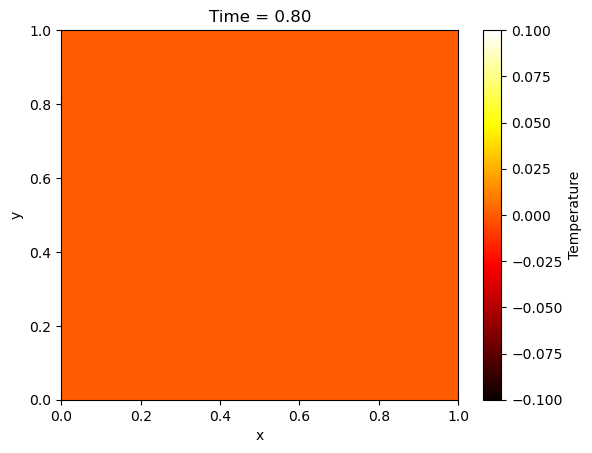

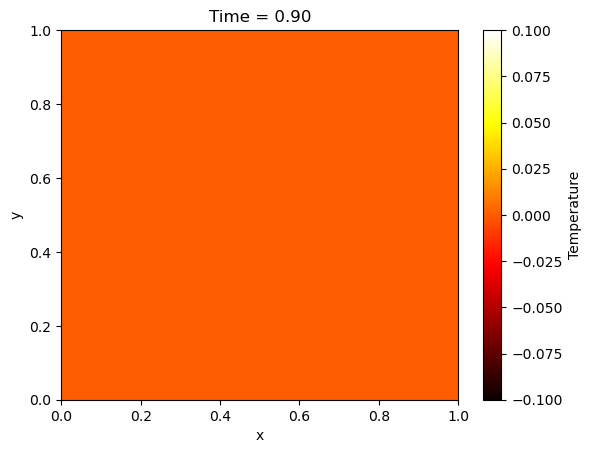

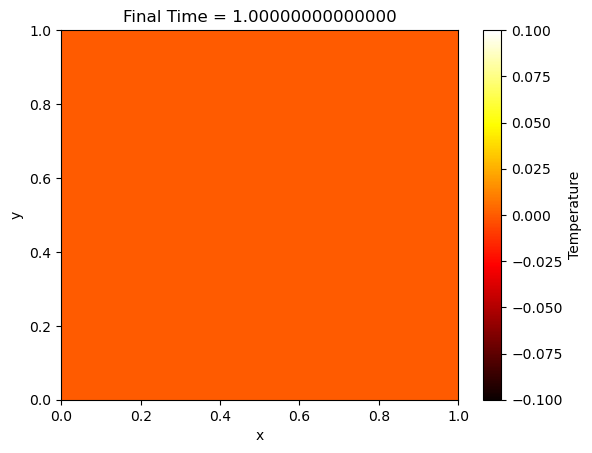

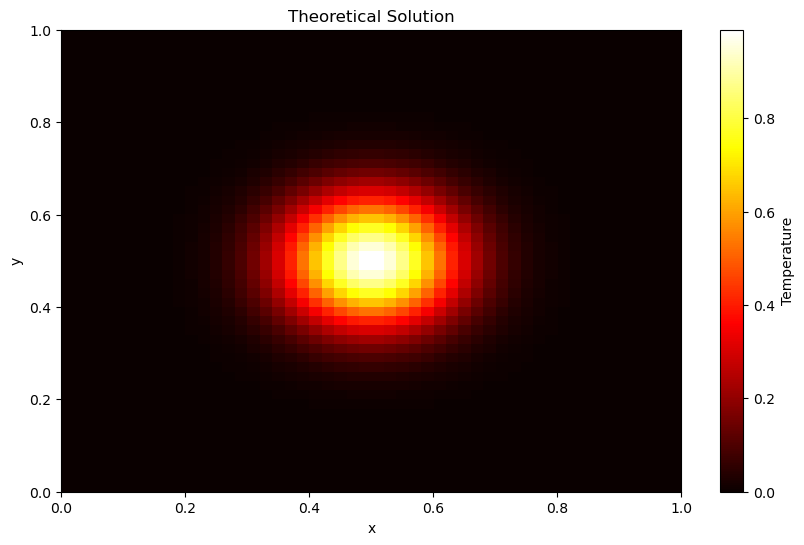

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.1  # Thermal diffusivity
Lx = Ly = 1.0  # Domain size
Nx = Ny = 50  # Number of grid points
dx = dy = Lx / Nx  # Grid spacing
T_final = 1.0  # Final time
Nt = 1000  # Number of time steps
dt = T_final / Nt  # Time step size

# Initial condition (e.g., a Gaussian distribution)
def initial_condition(x, y):
    return np.exp(-((x - 0.5)**2 + (y - 0.5)**2) / (2 * 0.1**2))

# Initialize temperature grid
u = np.zeros((Nx, Ny))

# Initialize plot
plt.figure(figsize=(10, 6))

# Perform Monte Carlo simulation
for t in range(Nt):
    # Update temperature using Monte Carlo method
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            u[i, j] += alpha * dt * ((u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / dx**2 +
                                    (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]) / dy**2)
    
    # Plot every few time steps (optional)
    if t % 100 == 0:
        plt.imshow(u.T, origin='lower', extent=[0, Lx, 0, Ly], cmap='hot', aspect='auto')
        plt.colorbar(label='Temperature')
        plt.title(f'Time = {t * dt:.2f}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.pause(0.01)
        plt.clf()

# Theoretical solution (example: steady-state solution for comparison)
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)
u_theory = initial_condition(X, Y)  # Example: steady-state of the initial condition

# Plot final simulated temperature distribution and theoretical solution
plt.imshow(u.T, origin='lower', extent=[0, Lx, 0, Ly], cmap='hot', aspect='auto')
plt.colorbar(label='Temperature')
plt.title(f'Final Time = {T_final}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(u_theory.T, origin='lower', extent=[0, Lx, 0, Ly], cmap='hot', aspect='auto')
plt.colorbar(label='Temperature')
plt.title('Theoretical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


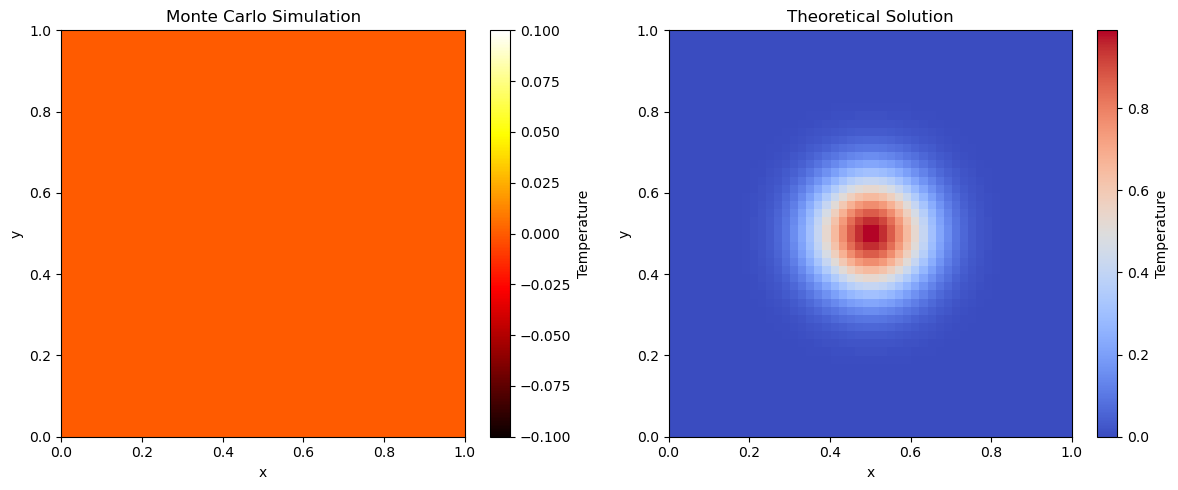

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.1  # Thermal diffusivity
Lx = Ly = 1.0  # Domain size
Nx = Ny = 50  # Number of grid points
dx = dy = Lx / Nx  # Grid spacing
T_final = 1.0  # Final time
Nt = 1000  # Number of time steps
dt = T_final / Nt  # Time step size

# Initial condition (e.g., a Gaussian distribution)
def initial_condition(x, y):
    return np.exp(-((x - 0.5)**2 + (y - 0.5)**2) / (2 * 0.1**2))

# Initialize temperature grid
u = np.zeros((Nx, Ny))

# Perform Monte Carlo simulation
for t in range(Nt):
    # Update temperature using Monte Carlo method
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            u[i, j] += alpha * dt * ((u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / dx**2 +
                                    (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]) / dy**2)

# Theoretical solution (example: steady-state solution for comparison)
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)
u_theory = initial_condition(X, Y)  # Example: steady-state of the initial condition

# Plotting
plt.figure(figsize=(12, 5))

# Plot Monte Carlo simulation results
plt.subplot(1, 2, 1)
plt.imshow(u.T, origin='lower', extent=[0, Lx, 0, Ly], cmap='hot', aspect='auto')
plt.colorbar(label='Temperature')
plt.title('Monte Carlo Simulation')
plt.xlabel('x')
plt.ylabel('y')

# Plot theoretical solution
plt.subplot(1, 2, 2)
plt.imshow(u_theory.T, origin='lower', extent=[0, Lx, 0, Ly], cmap='coolwarm', aspect='auto')
plt.colorbar(label='Temperature')
plt.title('Theoretical Solution')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()


# Monte Carlo for Black Scholes 

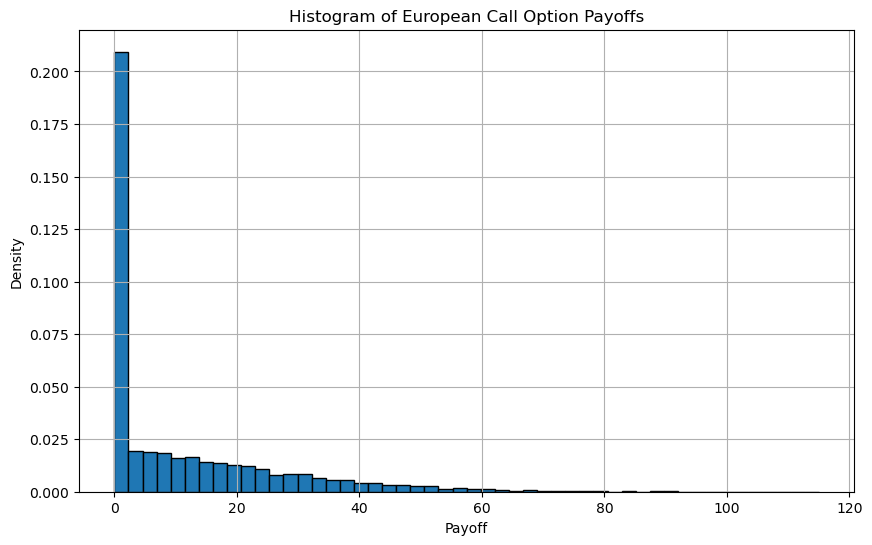

Estimated Option Price: 10.6516


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 1.0   # Time to maturity in years
M = 1000  # Number of time steps
N = 10000 # Number of simulations

# Generate random numbers
np.random.seed(0)
dt = T / M
S = np.zeros((M + 1, N))
S[0, :] = S0

for t in range(1, M + 1):
    Z = np.random.standard_normal(N)
    S[t, :] = S[t - 1, :] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Compute option payoff
payoff = np.maximum(S[-1, :] - K, 0)

# Discounted expected payoff
option_price = np.exp(-r * T) * np.mean(payoff)

# Plot histogram of simulated option prices
plt.figure(figsize=(10, 6))
plt.hist(payoff, bins=50, edgecolor='black', density=True)
plt.title('Histogram of European Call Option Payoffs')
plt.xlabel('Payoff')
plt.ylabel('Density')
plt.grid(True)
plt.show()

print(f"Estimated Option Price: {option_price:.4f}")


# Comparing to theoritical solution

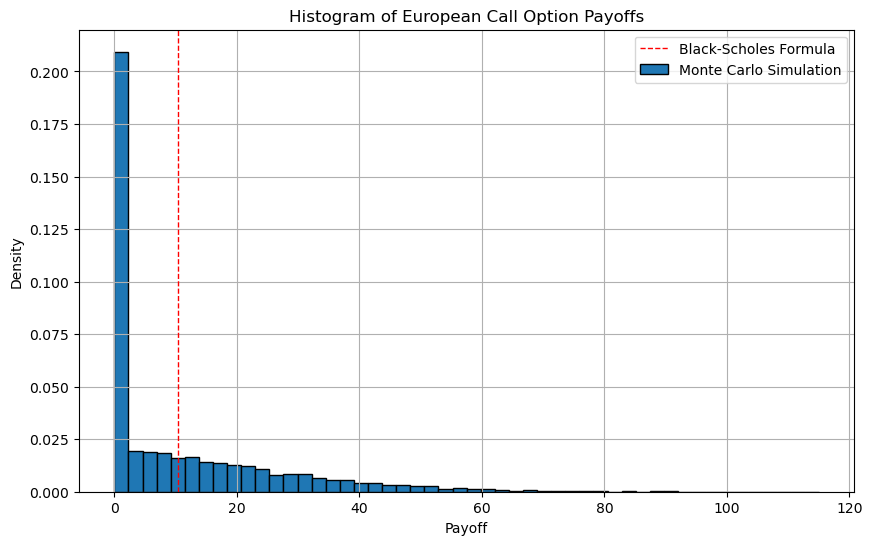

Estimated Option Price (Monte Carlo): 10.6516
Theoretical Option Price (Black-Scholes): 10.4506


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 1.0   # Time to maturity in years
M = 1000  # Number of time steps
N = 10000 # Number of simulations

# Generate random numbers
np.random.seed(0)
dt = T / M
S = np.zeros((M + 1, N))
S[0, :] = S0

for t in range(1, M + 1):
    Z = np.random.standard_normal(N)
    S[t, :] = S[t - 1, :] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Compute option payoff
payoff = np.maximum(S[-1, :] - K, 0)

# Discounted expected payoff
option_price_mc = np.exp(-r * T) * np.mean(payoff)

# Black-Scholes formula for European call option
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
option_price_bs = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Plot histogram of simulated option prices
plt.figure(figsize=(10, 6))
plt.hist(payoff, bins=50, edgecolor='black', density=True, label='Monte Carlo Simulation')
plt.axvline(option_price_bs, color='r', linestyle='dashed', linewidth=1, label='Black-Scholes Formula')
plt.title('Histogram of European Call Option Payoffs')
plt.xlabel('Payoff')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

print(f"Estimated Option Price (Monte Carlo): {option_price_mc:.4f}")
print(f"Theoretical Option Price (Black-Scholes): {option_price_bs:.4f}")
